In [19]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from classification_utils import *
from sklearn.neural_network import MLPClassifier
import pickle

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5148.794751,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.084281,0.365536,0.385427,1.357545,14.574041
std,0.499031,18496.606420,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.109621,0.408358,0.390777,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.017751,0.136692,0.119116,0.010526,0.104251
50%,1.000000,57.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.045752,0.230747,0.268594,0.043478,0.238606
75%,1.000000,2041.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.088862,0.451218,0.491767,0.949402,24.144412
max,1.000000,399555.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,0.529903,2.183383,1.723913,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

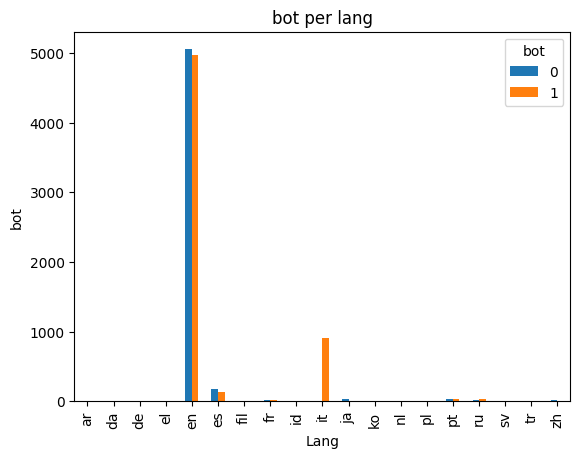

In [6]:
plot_lang_hist(data)

In [7]:
data = data.join(pd.get_dummies(data["lang"]))

In [8]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'ar', 'da', 'de', 'el', 'en', 'es', 'fil', 'fr', 'id', 'it', 'ja', 'ko', 'nl', 'pl', 'pt', 'ru', 'sv', 'tr', 'zh']


In [9]:
scaler = StandardScaler()
scaler.fit(train_set)
scaled_train_set = scaler.transform(train_set)
scaled_test_set = scaler.transform(test_set)

In [10]:
hidden_layer_sizes = [[10, 5], [20, 10], [15, 15, 10], [50, 25, 10]]
alpha = [0.0001, 0.001, 0.01, 0.1]
learning_rate_init = [0.001, 0.01, 0.1]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

In [11]:
param_grid = dict(
    hidden_layer_sizes = hidden_layer_sizes,
    alpha = alpha,
    learning_rate_init = learning_rate_init,
    momentum = momentum
)

grid = GridSearchCV(
    MLPClassifier(random_state = 8, activation='relu', max_iter = 250),
    param_grid = param_grid,
    cv = 3,
    scoring = 'accuracy',
    verbose = 4
)

grid.fit(scaled_train_set, train_label)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.831 total time=   3.1s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.837 total time=   2.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.835 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.831 total time=   3.4s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.837 total time=   2.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.835 total time=   3.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.831 total time=   3.3s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.837 total time=   2.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.835 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.831 total time=   3.2s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.837 total time=   3.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.835 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.831 total time=   3.2s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.837 total time=   3.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.835 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.831 total time=   3.2s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.837 total time=   3.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.835 total time=   3.4s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.831 total time=   0.8s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.833 total time=   1.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.839 total time=   1.8s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.831 total time=   1.0s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.833 total time=   1.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.839 total time=   1.8s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.831 total time

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.826 total time=   3.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.839 total time=   4.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.839 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.826 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.839 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.839 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.826 total time=   3.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.839 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.839 total time=   3.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.826 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.839 total time=   3.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.839 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.826 total time=   3.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.839 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.839 total time=   3.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.826 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.839 total time=   3.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.839 total time=   3.7s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.834 total time=   1.1s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.837 total time=   1.2s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.836 total time=   1.0s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.834 total time=   1.1s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.837 total time=   1.2s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.836 total time=   1.2s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.4;, score=0.834 to

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.0;, score=0.839 total time=   5.1s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.0;, score=0.820 total time=   3.5s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.2;, score=0.835 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.2;, score=0.839 total time=   4.9s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.2;, score=0.820 total time=   3.2s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.4;, score=0.835 total time=   4.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.4;, score=0.839 total time=   5.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.4;, score=0.820 total time=   3.1s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.6;, score=0.835 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.6;, score=0.839 total time=   5.4s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.6;, score=0.820 total time=   3.2s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.8;, score=0.835 total time=   4.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.8;, score=0.839 total time=   5.4s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.8;, score=0.820 total time=   3.2s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.9;, score=0.835 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.9;, score=0.839 total time=   4.9s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.9;, score=0.820 total time=   3.4s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.0;, score=0.835 total time=   1.3s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.0;, score=0.841 total time=   0.7s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.0;, score=0.831 total time=   2.8s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.2;, score=0.835 total time=   1.2s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.2;, score=0.841 total time=   0.8s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.0;, score=0.818 total time=   6.9s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.0;, score=0.838 total time=   5.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.0;, score=0.826 total time=   5.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.2;, score=0.818 total time=   6.5s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.2;, score=0.838 total time=   4.8s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.2;, score=0.826 total time=   5.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.4;, score=0.818 total time=   6.3s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.4;, score=0.838 total time=   4.9s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.4;, score=0.826 total time=   5.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.6;, score=0.818 total time=   6.3s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.6;, score=0.838 total time=   4.9s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.6;, score=0.826 total time=   5.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.8;, score=0.818 total time=   6.4s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.8;, score=0.838 total time=   5.1s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.8;, score=0.826 total time=   5.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.9;, score=0.818 total time=   6.1s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.9;, score=0.838 total time=   5.1s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.001, momentum=0.9;, score=0.826 total time=   5.4s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.0;, score=0.804 total time=   3.1s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.0;, score=0.822 total time=   3.8s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.0;, score=0.823 total time=   2.1s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.2;, score=0.804 total time=   3.4s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.834 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.839 total time=   3.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.836 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.834 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.839 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.836 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.834 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.839 total time=   3.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.836 total time=   3.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.834 total time=   3.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.839 total time=   3.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.836 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.834 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.839 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.836 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.834 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.839 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.836 total time=   3.4s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.831 total time=   1.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.841 total time=   1.8s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.837 total time=   2.0s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.831 total time=   1.6s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.841 total time=   1.7s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.837 total time=   2.1s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.831 total time=   1.6s

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.826 total time=   4.0s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.838 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.836 total time=   3.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.826 total time=   3.8s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.838 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.836 total time=   3.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.826 total time=   3.8s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.838 total time=   3.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.836 total time=   3.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.826 total time=   3.9s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.838 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.836 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.826 total time=   3.8s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.838 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.836 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.826 total time=   3.9s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.838 total time=   3.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.836 total time=   3.6s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.822 total time=   1.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.832 total time=   2.1s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.832 total time=   1.0s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.822 total time=   1.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.832 total time=   2.2s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.832 total time=   1.0s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.4;, score=0.822 total time

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.0;, score=0.831 total time=   4.6s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.0;, score=0.839 total time=   3.3s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.0;, score=0.817 total time=   3.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.2;, score=0.831 total time=   5.0s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.2;, score=0.839 total time=   3.1s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.2;, score=0.817 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.4;, score=0.831 total time=   4.8s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.4;, score=0.839 total time=   3.2s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.4;, score=0.817 total time=   3.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.6;, score=0.831 total time=   4.9s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.6;, score=0.839 total time=   3.0s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.6;, score=0.817 total time=   3.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.8;, score=0.831 total time= 5.8min
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.8;, score=0.839 total time=   3.3s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.8;, score=0.817 total time=   3.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.9;, score=0.831 total time=   5.5s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.9;, score=0.839 total time=   3.5s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.9;, score=0.817 total time=   3.4s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.0;, score=0.837 total time=   1.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.0;, score=0.845 total time=   0.9s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.0;, score=0.833 total time=   1.6s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.2;, score=0.837 total time=   1.8s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, mom

[CV 1/3] END alpha=0.001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.4;, score=0.822 total time=   2.8s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.4;, score=0.826 total time=   3.4s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.4;, score=0.822 total time=   2.4s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.6;, score=0.822 total time=   2.8s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.6;, score=0.826 total time=   3.4s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.6;, score=0.822 total time=   2.3s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.8;, score=0.822 total time=   2.8s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, moment

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.833 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.838 total time=   3.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.836 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.833 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.838 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.836 total time=   3.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.833 total time=   3.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.838 total time=   3.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.836 total time=   3.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.833 total time=   3.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.838 total time=   3.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.836 total time=   3.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.833 total time=   3.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.838 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.836 total time=   3.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.833 total time=   3.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.838 total time=   3.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.836 total time=   3.6s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.833 total time=   1.0s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.838 total time=   0.9s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.834 total time=   1.0s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.833 total time=   1.1s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.838 total time=   0.9s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.834 total time=   1.0s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.833 total time=   1.0s
[CV 2/3

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.825 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.837 total time=   4.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.834 total time=   4.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.825 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.837 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.834 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.825 total time=   4.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.837 total time=   4.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.834 total time=   4.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.825 total time=   4.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.837 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.834 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.825 total time=   4.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.837 total time=   4.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.834 total time=   4.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.825 total time=   4.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.837 total time=   4.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.834 total time=   4.0s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.827 total time=   1.4s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.836 total time=   1.4s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.826 total time=   2.1s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.827 total time=   1.5s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.836 total time=   1.5s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.826 total time=   2.0s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.4;, score=0.827 total time=   1.5s

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.0;, score=0.844 total time=   5.5s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.0;, score=0.819 total time=   3.8s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.2;, score=0.833 total time=   3.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.2;, score=0.844 total time=   5.0s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.2;, score=0.819 total time=   3.2s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.4;, score=0.833 total time=   3.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.4;, score=0.844 total time=   5.0s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.4;, score=0.819 total time=   3.3s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.6;, score=0.833 total time=   3.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.6;, score=0.844 total time=   5.1s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.6;, score=0.819 total time=   3.2s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.8;, score=0.833 total time=   3.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.8;, score=0.844 total time=   5.0s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.8;, score=0.819 total time=   3.4s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.9;, score=0.833 total time=   3.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.9;, score=0.844 total time=   5.0s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.001, momentum=0.9;, score=0.819 total time=   3.3s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.0;, score=0.825 total time=   1.9s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.0;, score=0.841 total time=   1.6s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.0;, score=0.826 total time=   1.2s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.2;, score=0.825 total time=   1.7s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.2;, score=0.841 total time=   1.6s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.2

[CV 3/3] END alpha=0.01, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.4;, score=0.827 total time=   2.3s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.6;, score=0.831 total time=   2.4s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.6;, score=0.840 total time=   2.3s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.6;, score=0.827 total time=   2.4s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.8;, score=0.831 total time=   2.4s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.8;, score=0.840 total time=   2.3s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.8;, score=0.827 total time=   2.4s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.01, momentum=0.9;,

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.840 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.842 total time=   3.4s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.834 total time=   3.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.840 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.842 total time=   3.5s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.834 total time=   3.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.840 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.842 total time=   3.5s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.834 total time=   3.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.840 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.842 total time=   3.4s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.834 total time=   3.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.840 total time=   3.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.842 total time=   3.4s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.834 total time=   3.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.840 total time=   3.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.842 total time=   3.4s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.834 total time=   1.1s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.839 total time=   0.9s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.839 total time=   1.1s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.834 total time=   1.1s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.839 total time=   0.8s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.839 total time=   1.1s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.834 total time=   1.1s
[CV 2/3] END al

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.834 total time=   3.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.837 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.0;, score=0.839 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.834 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.837 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.2;, score=0.839 total time=   4.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.834 total time=   4.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.837 total time=   4.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.4;, score=0.839 total time=   4.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.834 total time=   4.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.837 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.6;, score=0.839 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.834 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.837 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.8;, score=0.839 total time=   3.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.834 total time=   4.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.837 total time=   4.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.001, momentum=0.9;, score=0.839 total time=   4.0s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.833 total time=   0.7s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.839 total time=   1.2s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.0;, score=0.832 total time=   1.6s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.833 total time=   0.7s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.839 total time=   1.2s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.2;, score=0.832 total time=   1.6s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[20, 10], learning_rate_init=0.01, momentum=0.4;, score=0.833 total time=   0.7s
[CV 2/3

[CV 3/3] END alpha=0.1, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.6;, score=0.834 total time=   1.1s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.8;, score=0.837 total time=   1.4s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.8;, score=0.839 total time=   0.8s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.8;, score=0.834 total time=   1.1s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.9;, score=0.837 total time=   1.4s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.9;, score=0.839 total time=   0.8s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.01, momentum=0.9;, score=0.834 total time=   1.0s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[15, 15, 10], learning_rate_init=0.1, momentum=0.0;, score=0.

[CV 2/3] END alpha=0.1, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.1, momentum=0.2;, score=0.825 total time=   1.1s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.1, momentum=0.2;, score=0.806 total time=   1.0s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.1, momentum=0.4;, score=0.817 total time=   1.0s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.1, momentum=0.4;, score=0.825 total time=   1.0s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.1, momentum=0.4;, score=0.806 total time=   1.0s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.1, momentum=0.6;, score=0.817 total time=   0.9s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.1, momentum=0.6;, score=0.825 total time=   1.0s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[50, 25, 10], learning_rate_init=0.1, momentum=0.6;, score=0.806 tot

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=250, random_state=8),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [[10, 5], [20, 10], [15, 15, 10],
                                                [50, 25, 10]],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]},
             scoring='accuracy', verbose=4)

In [12]:
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'alpha': 0.1, 'hidden_layer_sizes': [10, 5], 'learning_rate_init': 0.001, 'momentum': 0.0} with a score of 0.83861


In [13]:
nn = grid.best_estimator_

In [14]:
train_pred = nn.predict(scaled_train_set)
test_pred = nn.predict(scaled_test_set)

In [15]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.8527622594661701
Accuracy test set  0.8352157544164495
Precision train set  0.8744923063903254
Recall train set  0.8527622594661701
F1 score train set  0.8491941049391215
Support train set  (array([0.96714801, 0.79280984]), array([0.70985692, 0.97874328]), array([0.81876528, 0.87601923]), array([3774, 4281], dtype=int64))


In [16]:
#compute the performance of the model
report_scores(test_label, test_pred)

              precision    recall  f1-score   support

        <=50       0.94      0.69      0.80      1618
         >50       0.78      0.96      0.86      1835

    accuracy                           0.84      3453
   macro avg       0.86      0.83      0.83      3453
weighted avg       0.85      0.84      0.83      3453



In [17]:
# cross validation
scores = cross_validate(nn, scaled_train_set, train_label, cv = 3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Fit time  3.928741375605265
Score time  0.00944844881693522
Test score  0.8386095592799503
Train score  0.8577281191806332


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


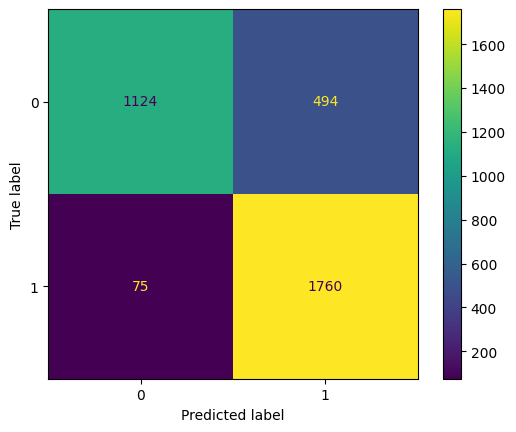

In [20]:
predictions = nn.predict(scaled_test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [46]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(scaled_test_set)

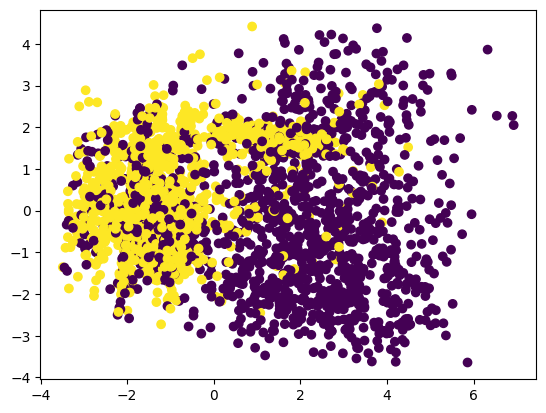

In [47]:
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

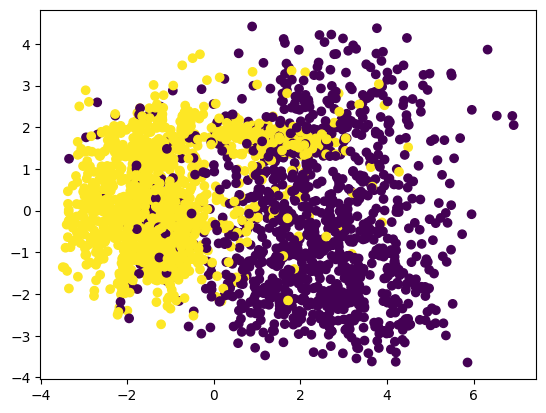

In [48]:
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);

In [24]:
with open("models_checkpoints/nn_lang.bin", "wb") as f:
    pickle.dump(nn, f)

### Without lang

In [25]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [26]:
data.drop(columns=['lang'])

,name,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911861962,Madrid Lae Maika .,0,2019-11-29 13:16:02,1126,52.677158,12.767086,0.024281,0.775180,0.192446,0.0,0.0,0.053058,0.250664,0.297762,0.043478,58.838683
1378532629,Clau Sato,0,2018-04-27 03:01:58,3024,59.716210,12.984608,0.088504,0.524772,0.114959,0.0,0.0,0.199134,0.506598,0.773291,4.565176,34.533536
126984069,ALMA LETICIA NUÑO,0,2015-03-29 17:01:24,6,67.666667,15.833333,0.005109,0.333333,0.333333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2383025796,Minnie Guadagno,1,2019-03-13 02:44:13,42,63.278846,13.971154,0.000000,0.365385,0.009615,0.0,0.0,0.076923,0.266469,0.391244,0.067308,0.286371


In [27]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std']


In [30]:
scaler = StandardScaler()
scaler.fit(train_set)
scaled_train_set = scaler.transform(train_set)
scaled_test_set = scaler.transform(test_set)

In [31]:
hidden_layer_sizes = [[5, 10], [10, 5], [5, 10, 10],[5, 5, 10]]
alpha = [0.0001, 0.001, 0.01, 0.1]
learning_rate_init = [0.001, 0.01, 0.1]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

In [32]:
param_grid = dict(
    hidden_layer_sizes = hidden_layer_sizes,
    alpha = alpha,
    learning_rate_init = learning_rate_init,
    momentum = momentum
)

grid = GridSearchCV(
    MLPClassifier(random_state = 8, activation='relu', max_iter=100),
    param_grid = param_grid,
    cv = 3,
    scoring = 'accuracy',
    verbose = 4
)

grid.fit(scaled_train_set, train_label)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.821 total time=   1.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.829 total time=   1.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.820 total time=   1.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.821 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.829 total time=   1.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.821 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.829 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.821 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.829 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.821 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.829 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.821 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.829 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.820 total time=   1.3s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.836 total time=   1.1s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.841 total time=   1.1s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.836 total time=   1.1s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.836 total time=   1.1s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.841 total time=   1.1s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.836 total time=   1.2s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.4;, score=0.836 total time

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.837 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.834 total time=   1.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.820 total time=   1.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.837 total time=   1.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.834 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.837 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.834 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.837 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.834 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.837 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.834 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.820 total time=   1.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.837 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.834 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.835 total time=   1.4s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.839 total time=   1.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.845 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.835 total time=   1.4s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.839 total time=   1.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.845 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.835 total time=   1.3s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.839 total time=   1.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.845 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.6;, score=0.835 total time=   1.3s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.6;, score=0.839 total time=   1.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.6;, score=0.845 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.8;, score=0.835 total time=   1.3s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.8;, score=0.839 total time=   1.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.8;, score=0.845 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.9;, score=0.835 total time=   1.4s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.9;, score=0.839 total time=   1.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.9;, score=0.845 total time=   1.2s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.0;, score=0.829 total time=   0.5s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.0;, score=0.836 total time=   0.6s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.0;, score=0.832 total time=   0.4s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.2;, score=0.829 total time=   0.5s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.2;, score=0.836 total time=   0.

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.826 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.828 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.822 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.826 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.828 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.822 total time=   1.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.826 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.828 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.822 total time=   1.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.826 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.828 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.822 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.826 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.828 total time=   1.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.822 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.826 total time=   1.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.828 total time=   1.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.822 total time=   1.7s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.826 total time=   1.2s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.841 total time=   1.5s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.838 total time=   1.5s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.826 total time=   1.2s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.841 total time=   1.5s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.838 total time=   1.6s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momen

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.818 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.822 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.830 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.818 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.822 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.830 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.818 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.822 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.830 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.818 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.822 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.830 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.818 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.822 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.830 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.818 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.822 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.830 total time=   1.6s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.839 total time=   1.7s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.837 total time=   1.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.837 total time=   1.3s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.839 total time=   1.6s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.837 total time=   1.0s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.837 total time=   1.3s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.4;

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.830 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.830 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.830 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.830 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.830 total time=   1.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.830 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.820 total time=   1.3s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.834 total time=   0.8s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.843 total time=   1.1s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.836 total time=   1.3s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.834 total time=   0.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.843 total time=   1.0s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.836 total time=   1.1s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.4;, score=0.834 total time=   0.7s

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.821 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.834 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.833 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.821 total time=   1.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.834 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.833 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.821 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.834 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.833 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.821 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.834 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.833 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.821 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.834 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.833 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.821 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.834 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.833 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.837 total time=   1.3s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.835 total time=   0.9s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.839 total time=   0.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.837 total time=   1.3s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.835 total time=   1.0s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.839 total time=   0.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.837 total time=   1.3s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.835 total time=   0.9s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.839 total time=   0.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.6;, score=0.837 total time=   1.3s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.6;, score=0.835 total time=   1.1s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.6;, score=0.839 total time=   1.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.8;, score=0.837 total time=   1.3s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.8;, score=0.835 total time=   0.9s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.8;, score=0.839 total time=   0.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.9;, score=0.837 total time=   1.3s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.9;, score=0.835 total time=   0.9s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.9;, score=0.839 total time=   0.9s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.0;, score=0.833 total time=   0.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.0;, score=0.834 total time=   0.5s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.0;, score=0.836 total time=   0.7s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.2;, score=0.833 total time=   0.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.2;, score=0.834 total time=   0.5s
[CV 3

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.827 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.822 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.827 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.822 total time=   1.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.827 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.822 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.827 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.822 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.827 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.822 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.827 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.822 total time=   1.6s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.836 total time=   0.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.838 total time=   0.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.836 total time=   1.6s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.836 total time=   0.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.838 total time=   0.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.836 total time=   1.6s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.4;, score=0.836 total time=   0.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.4;, score=0.838 total time=   0.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.4;, score=0.836 total time=   1.7s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.6;, score=0.836 total time=   0.8s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.6;, score=0.838 total time=   0.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.6;, score=0.836 total time=   1.7s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.8;, score=0.836 total time=   0.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.8;, score=0.838 total time=   0.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.8;, score=0.836 total time=   1.6s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.9;, score=0.836 total time=   0.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.9;, score=0.838 total time=   0.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.9;, score=0.836 total time=   1.6s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.1, momentum=0.0;, score=0.826 total time=   0.9s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.1, momentum=0.0;, score=0.838 total time=   1.2s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.1, momentum=0.0;, score=0.830 total time=   0.6s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.1, momentum=0.2;, score=0.826 total time=   0.9s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.1, momentum=0.2;, score=0.838 total time=   1.3s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.1, momentum=0.2;, score=0.830 total time=   0.6s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.1, momentum=0.4;, score=

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.819 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.830 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.819 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.830 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.819 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.830 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.819 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.830 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.819 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.830 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.819 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.830 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.838 total time=   1.6s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.840 total time=   1.2s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.840 total time=   1.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.838 total time=   1.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.840 total time=   1.2s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.840 total time=   1.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.4;, score=0.838 total time=   1.6s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.4;, score=0.840 total time=   1.2s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.4;, score=0.840 total time=   1.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.6;, score=0.838 total time=   1.6s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.6;, score=0.840 total time=   1.2s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.6;, score=0.840 total time=   1.0s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.8;, score=0.838 total time=   1.6s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.8;, score=0.840 total time=   1.3s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.8;, score=0.840 total time=   1.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.9;, score=0.838 total time=   1.7s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.9;, score=0.840 total time=   1.2s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.9;, score=0.840 total time=   1.0s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.1, momentum=0.0;, score=0.828 total time=   0.6s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.1, momentum=0.0;, score=0.833 total time=   1.0s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.1, momentum=0.0;, score=0.836 total time=   0.9s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.1, momentum=0.2;, score=0.828 total time=   0.6s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.1, momentum=0.2;, score=0.833 

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.830 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.819 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.830 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.819 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.830 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.819 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.830 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.819 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.830 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.819 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.830 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.819 total time=   1.2s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.830 total time=   1.0s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.844 total time=   0.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.837 total time=   1.4s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.830 total time=   0.9s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.844 total time=   0.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.837 total time=   1.3s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.4;, score=0.830 total time=   0.9s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.4;, score=0.844 total time=   0.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.4;, score=0.837 total time=   1.2s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.6;, score=0.830 total time=   0.9s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.6;, score=0.844 total time=   0.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.6;, score=0.837 total time=   1.2s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.8;, score=0.830 total time=   0.9s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.8;, score=0.844 total time=   0.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.8;, score=0.837 total time=   1.3s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.9;, score=0.830 total time=   0.9s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.9;, score=0.844 total time=   0.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.9;, score=0.837 total time=   1.3s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.1, momentum=0.0;, score=0.835 total time=   0.5s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.1, momentum=0.0;, score=0.838 total time=   0.5s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.1, momentum=0.0;, score=0.834 total time=   0.3s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.1, momentum=0.2;, score=0.835 total time=   0.6s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.1, momentum=0.2;, score=0.838 total time=   0.4s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.1, momentum=0.2;, score=0.834 total time=   0.3s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10], learning_rate_init=0.1, momentum=0.4;, score=0.835 total time=   0.6s
[CV 2/3] END al

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.838 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.835 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.838 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.835 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.838 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.835 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.838 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.835 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.838 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.835 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.838 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.835 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.831 total time=   1.3s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.843 total time=   0.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.839 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.831 total time=   1.3s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.843 total time=   0.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.839 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.831 total time=   1.3s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.843 total time=   0.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.839 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.6;, score=0.831 total time=   1.3s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.6;, score=0.843 total time=   0.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.6;, score=0.839 total time=   1.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.8;, score=0.831 total time=   1.2s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.8;, score=0.843 total time=   0.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.8;, score=0.839 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.9;, score=0.831 total time=   1.4s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.9;, score=0.843 total time=   0.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.9;, score=0.839 total time=   1.3s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.0;, score=0.828 total time=   0.6s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.0;, score=0.834 total time=   0.6s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.0;, score=0.806 total time=   0.6s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.2;, score=0.828 total time=   0.5s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.2;, score=0.834 total time=   0.5s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.2;, score=0.806 total time=   0.6s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[10, 5], learning_rate_init=0.1, momentum=0.4;, score=0.828 total time=   0.5s
[CV 2/3] END al

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.826 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.828 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.823 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.826 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.828 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.823 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.826 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.828 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.823 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.826 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.828 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.823 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.826 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.828 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.823 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.826 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.828 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.823 total time=   1.6s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.839 total time=   1.1s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.843 total time=   1.0s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.838 total time=   1.5s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.839 total time=   1.1s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.843 total time=   1.1s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.838 total time=   1.5s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.4;, score=

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.816 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.826 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.830 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.816 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.826 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.830 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.816 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.826 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.830 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.816 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.826 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.830 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.816 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.826 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.830 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.816 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.826 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.830 total time=   1.6s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.833 total time=   0.9s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.834 total time=   1.0s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.831 total time=   0.9s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.833 total time=   0.9s
[CV 2/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.834 total time=   1.0s
[CV 3/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.831 total time=   0.9s
[CV 1/3] END alpha=0.01, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.4;, score=0.833 to

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.830 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.821 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.830 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.821 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.820 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.830 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.821 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.830 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.821 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.830 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.821 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.820 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.830 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.821 total time=   1.3s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.834 total time=   0.9s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.848 total time=   1.0s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.835 total time=   0.7s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.834 total time=   1.0s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.848 total time=   1.0s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.835 total time=   0.7s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10], learning_rate_init=0.01, momentum=0.4;, score=0.834 total time=   0.9s
[CV 2/3] END al

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.824 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.838 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.0;, score=0.832 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.824 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.838 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.2;, score=0.832 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.824 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.838 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.4;, score=0.832 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.824 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.838 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.6;, score=0.832 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.824 total time=   1.2s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.838 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.8;, score=0.832 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.824 total time=   1.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.838 total time=   1.3s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.001, momentum=0.9;, score=0.832 total time=   1.3s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.835 total time=   1.0s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.843 total time=   0.5s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.0;, score=0.841 total time=   1.1s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.835 total time=   0.9s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.843 total time=   0.6s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.2;, score=0.841 total time=   1.1s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[10, 5], learning_rate_init=0.01, momentum=0.4;, score=0.835 total time=   0.9s
[CV 2/3] END al

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.822 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.829 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.0;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.822 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.829 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.2;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.822 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.829 total time=   1.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.4;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.822 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.829 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.6;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.822 total time=   2.1s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.829 total time=   1.9s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.8;, score=0.825 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.822 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.829 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.001, momentum=0.9;, score=0.825 total time=   1.6s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.840 total time=   0.7s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.844 total time=   1.0s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.0;, score=0.835 total time=   1.1s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.840 total time=   0.7s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.844 total time=   0.9s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.2;, score=0.835 total time=   1.0s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 10, 10], learning_rate_init=0.01, momentum=0.4;, score=0.840 to

C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.819 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.831 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.0;, score=0.829 total time=   1.8s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.819 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.831 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.2;, score=0.829 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.819 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.831 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.4;, score=0.829 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.819 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.831 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.6;, score=0.829 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.819 total time=   1.7s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.831 total time=   1.5s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.8;, score=0.829 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.819 total time=   1.6s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.831 total time=   2.4s


C:\Users\espos\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.001, momentum=0.9;, score=0.829 total time=   1.7s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.837 total time=   1.3s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.838 total time=   1.2s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.0;, score=0.831 total time=   1.8s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.837 total time=   1.5s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.838 total time=   1.4s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.2;, score=0.831 total time=   1.9s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=[5, 5, 10], learning_rate_init=0.01, momentum=0.4;, score=0.837 total time

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=8),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [[5, 10], [10, 5], [5, 10, 10],
                                                [5, 5, 10]],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]},
             scoring='accuracy', verbose=4)

In [33]:
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'alpha': 0.01, 'hidden_layer_sizes': [5, 10, 10], 'learning_rate_init': 0.01, 'momentum': 0.0} with a score of 0.83998


In [34]:
nn = grid.best_estimator_

In [35]:
train_pred = nn.predict(scaled_train_set)
test_pred = nn.predict(scaled_test_set)

In [36]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.848665425201738
Accuracy test set  0.8456414711844773
Precision train set  0.8763514482266085
Recall train set  0.848665425201738
F1 score train set  0.844213654730373
Support train set  (array([0.98189363, 0.78330866]), array([0.68971913, 0.98878767]), array([0.81027237, 0.87413526]), array([3774, 4281], dtype=int64))


In [37]:
#compute the performance of the model
report_scores(test_label, test_pred)

              precision    recall  f1-score   support

        <=50       0.97      0.69      0.81      1618
         >50       0.78      0.98      0.87      1835

    accuracy                           0.85      3453
   macro avg       0.88      0.84      0.84      3453
weighted avg       0.87      0.85      0.84      3453



In [38]:
scores = cross_validate(nn, scaled_train_set, train_label, cv = 3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  1.4655227661132812
Score time  0.0010381539662679036
Test score  0.8399751707014277
Train score  0.849286157666046


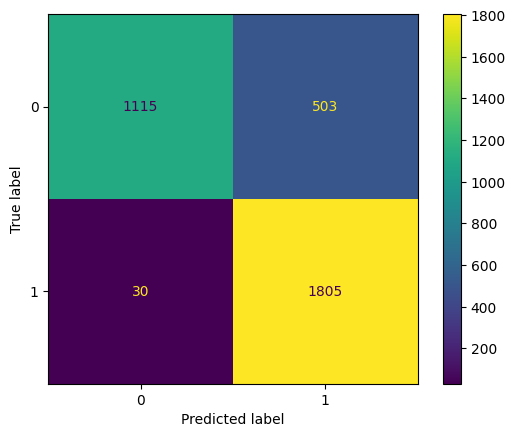

In [39]:
predictions = nn.predict(scaled_test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [49]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(scaled_test_set)

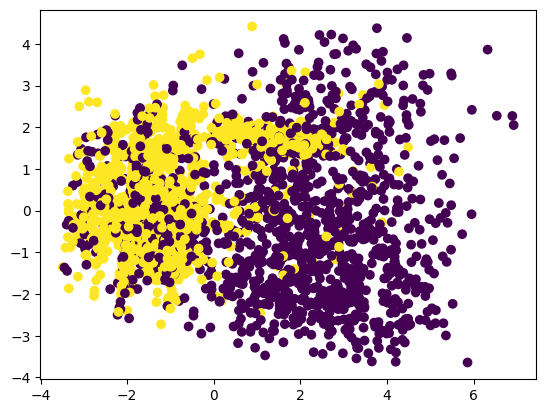

In [50]:
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

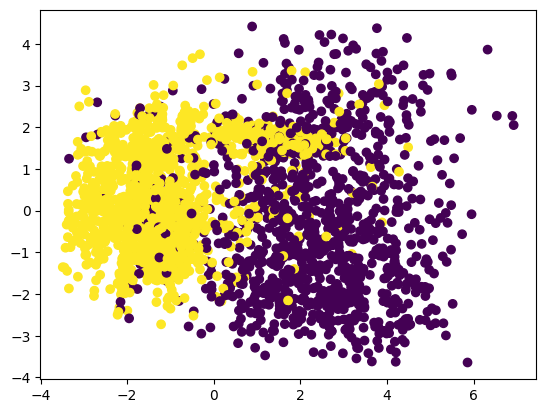

In [51]:
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);

In [43]:
with open("models_checkpoints/nn_no_lang.bin", "wb") as f:
    pickle.dump(nn, f)